<h1 align = 'center'><B><U>Practical Lab</U> - <U>9</U> : <U>Dense Neural Network</U></B></h1>
<h3 align = 'center'><B><U>Waseem Iqbal Shaikh(8902834)</U></B></h3> 

### Importing necessary packages:

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Loading the dataset:

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0, 0, 0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


### Printing a few training data:

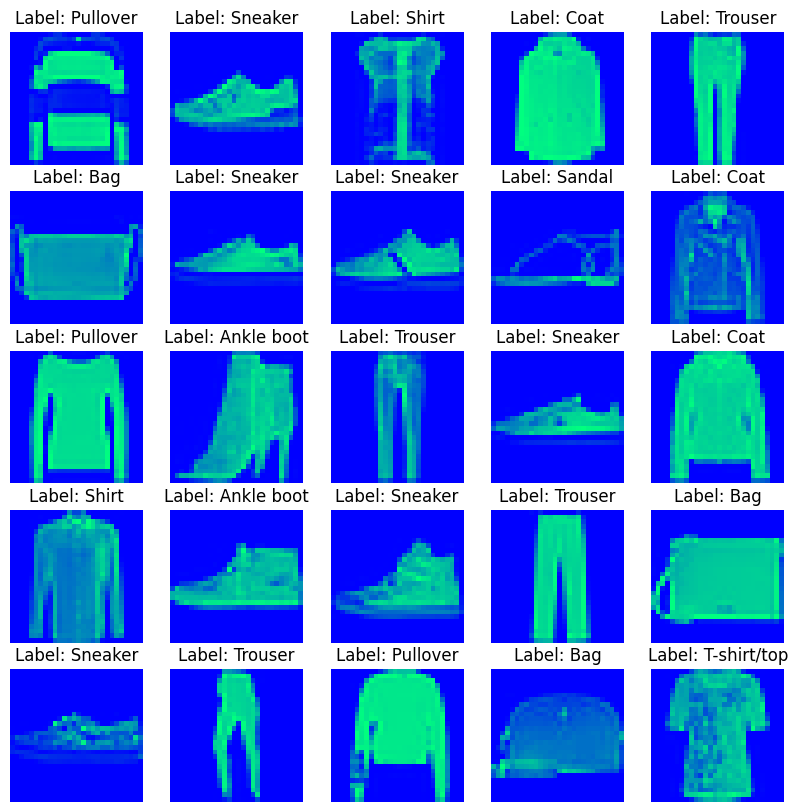

In [26]:
label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

plt.figure(figsize=(10, 10))
count = 1
for x in range(125,150):
    plt.subplot(5, 5, count)
    plt.imshow(train_images[x], cmap="winter")
    plt.title(f"Label: {label_description[train_labels[x]]}")
    plt.axis('off')
    count+=1
plt.show()

### Printing a few testing data:

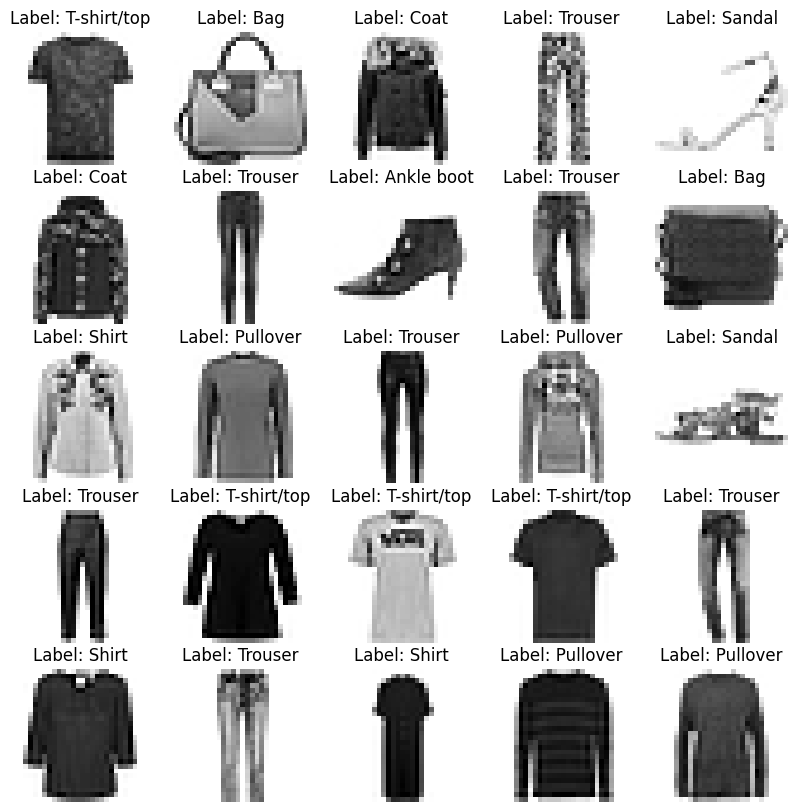

In [27]:
plt.figure(figsize=(10, 10))
counter = 1
for i in range(125,150):
    plt.subplot(5, 5, counter)
    plt.imshow(test_images[i], cmap='binary') # cmap is cool
    plt.title(f"Label: {label_description[test_labels[i]]}")
    plt.axis('off')
    counter+=1
plt.show()

### Normalizing the data:

In [28]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### One-hot encoding the labels:

In [29]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### Building the neural network:

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Compiling the model:

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model:

In [32]:
epochs = 10
batch_size = 64
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10


844/844 [==============================] - 4s 4ms/step - loss: 0.5326 - accuracy: 0.8156 - val_loss: 0.4149 - val_accuracy: 0.8502
Epoch 2/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3970 - accuracy: 0.8604 - val_loss: 0.3953 - val_accuracy: 0.8553
Epoch 3/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3542 - accuracy: 0.8726 - val_loss: 0.3531 - val_accuracy: 0.8727
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3269 - accuracy: 0.8816 - val_loss: 0.3492 - val_accuracy: 0.8755
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3124 - accuracy: 0.8857 - val_loss: 0.3294 - val_accuracy: 0.8800
Epoch 6/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2925 - accuracy: 0.8924 - val_loss: 0.3304 - val_accuracy: 0.8785
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2827 - accuracy: 0.8947 - val_loss: 0.3461 - val_accuracy: 0.8778
Epoch 8/10
844/84

### Evaluating and creating the confusion matrix:

313/313 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8781
Test accuracy: 0.8781
313/313 [==============================] - 0s 1ms/step


<Figure size 800x800 with 0 Axes>

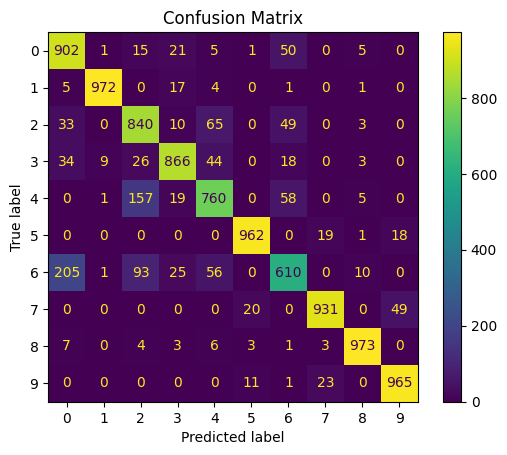

In [33]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_description.keys())
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


### On the fMNIST dataset, the dense neural network obtained an amazing test accuracy of roughly 87.51%. The confusion matrix breaks down the model's predictions for each class in great detail. The genuine classes are represented by each row, while the predicted classes are represented by each column. The diagonal elements represent real positives, whereas the off-diagonal elements reflect misclassifications. The number 105, for example, at the junction of row 1 and column 7, indicates that 105 T-shirt/top photos were incorrectly categorised as shirts. Overall, the model performs well, however it has difficulty distinguishing between specific classes, such as Pullover and Coat, or Shirt and T-shirt/top. These specific misclassifications indicate the need for additional study and model adjustment in order to enhance performance on these specific classes.

### Exploring the specific examples of incorrect classification:

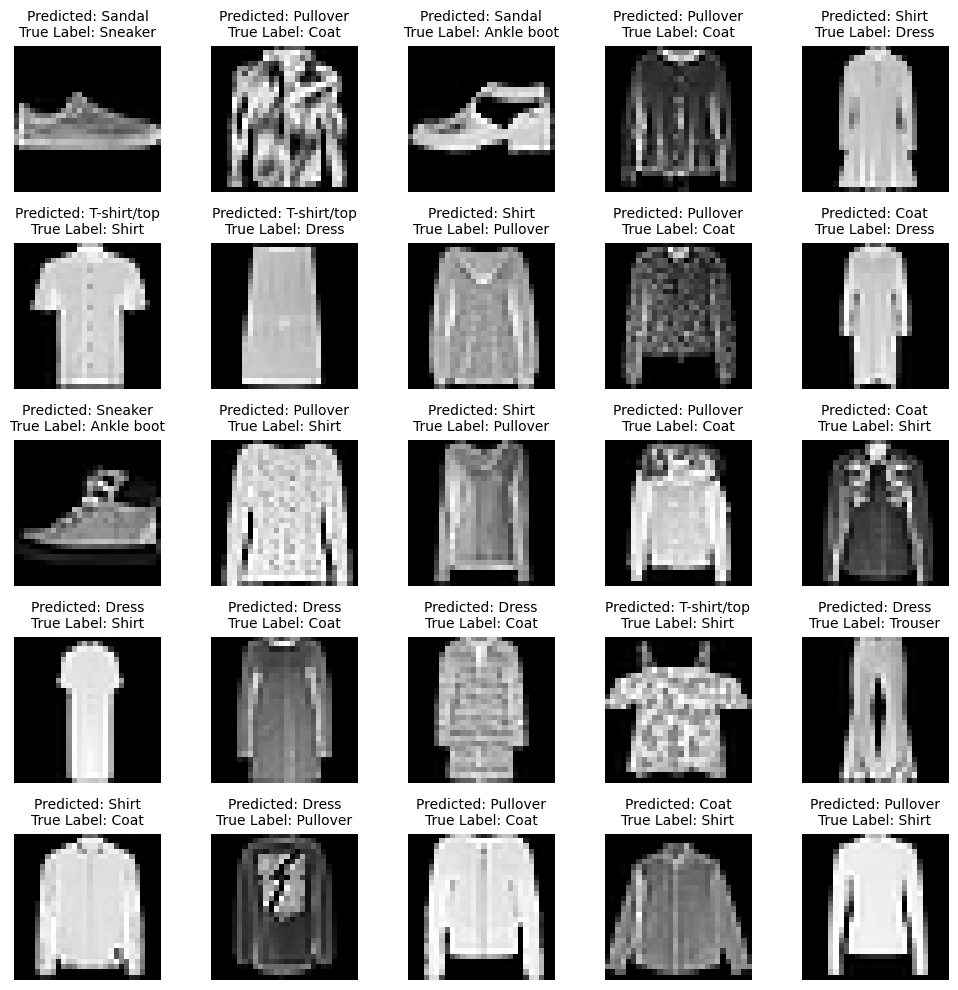

In [37]:
misclassified_indices = np.where(predicted_labels != np.argmax(test_labels, axis=1))[0]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    index = misclassified_indices[i]
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"Predicted: {label_description[predicted_labels[index]]}\nTrue Label: {label_description[np.argmax(test_labels[index])]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Observations after exploring the examples of incorrect classification:

- For classes such as "Trouser," "Sandal," "Bag," and "Ankle boot," the model obtains high precision and recall, showing great performance in correctly categorising these items.

- Classes like "T-shirt/top," "Dress," and "Coat" have slightly lower precision and recall than the ones described above.


- The classes "Pullover" and "Shirt" exhibit worse precision and recall, showing that the model struggles with these objects more.

- The macro-average F1-score, which gives equal weight to each class, is 0.88, indicating a good overall performance.

- The weighted average F1-score, which takes into consideration class imbalance, is also 0.88, showing that performance is balanced across classes.
